In [ ]:
#source1 https://www.analyticsvidhya.com/blog/2021/06/feature-selection-using-statistical-tests/

In [10]:
sys_bp=[183, 152, 178, 157, 194, 163, 144, 114, 178, 152, 118, 158, 172, 138]


mu=165


from scipy import stats

t_value,p_value=stats.ttest_1samp(sys_bp,mu)

one_tailed_p_value=float("{:.6f}".format(p_value/2)) # Since alternative hypothesis is one tailed, We need to divide the p value by 2.

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for one tailed test is %f'%one_tailed_p_value)

alpha = 0.05

if one_tailed_p_value<=alpha:

    print('Conclusion','n','Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. 

So we conclude that there is no significant mean difference in systolic blood pressure. 

i.e., μ = 165 at %.2f level of significance'''%alpha)

else:

    print('Conclusion','n','Since p-value(=%f)'%one_tailed_p_value,'>','alpha(=%.2f)'%alpha,'We do not reject the null hypothesis H0.')

Test statistic is -1.243183
p-value for one tailed test is 0.117877
Conclusion n Since p-value(=0.117877) > alpha(=0.05) We do not reject the null hypothesis H0.


In [ ]:
# Student t-distribution Percent Point Function
from scipy.stats import t,ttest_1sampe
# define probability
p = 0.95
df = 10
# retrieve value <= probability
value = t.ppf(p, df)
print(value)
# confirm with cdf
p = t.cdf(value, df)
print(p)

In [37]:
from scipy.stats import t,ttest_1samp
def one_sample_t_test(data,mu,alpha):
    dof = len(data)-1 
    t_critical = t.ppf(1-alpha,dof)
    t_value,p_value=ttest_1samp(data,mu)
    print('t_critical: {}, alpha: {}'.format(round(t_critical,4),round(alpha,4)))
    if ((t_value>t_critical) and (p_value<alpha)) or ((t_value<-t_critical) and (p_value<alpha)):
        return 'reject null hypothesis with t:{} & p:{}'.format(round(t_value,4),round(p_value,4))
    else:
        return 'fail to reject null hypothesis with t:{} & p:{}'.format(round(t_value,4),round(p_value,4))

In [38]:
sys_bp=[183, 152, 178, 157, 194, 163, 144, 114, 178, 152, 118, 158, 172, 138]
mu=165
one_sample_t_test(sys_bp,mu,alpha=0.05)

t_critical: 1.7709, alpha: 0.05


'fail to reject null hypothesis with t:-1.2432 & p:0.2358'

In [43]:
from scipy.stats import t,ttest_ind
def two_sample_t_test(dataA,dataB,alpha):
    dof = len(dataA)+len(dataB)-2
    t_critical = t.ppf(1-alpha,dof)
    t_value,p_value=ttest_ind(dataA,dataB)
    print('t_critical: {}, alpha: {}'.format(round(t_critical,4),round(alpha,4)))
    if ((t_value>t_critical) and (p_value<alpha)) or ((t_value<-t_critical) and (p_value<alpha)):
        return 'reject null hypothesis with t:{} & p:{}'.format(roudn(t_value,4),round(p_value,4))
    else:
        return 'fail to reject null hypothesis with t:{} & p:{}'.format(round(t_value,4),round(p_value,4))

In [44]:
dataA=[13.4,10.9,11.2,11.8,14,15.3,14.2,12.6,17,16.2,16.5,15.7]
dataB=[12,11.7,10.7,11.2,14.8,14.4,13.9,13.7,16.9,16,15.6,16]
two_sample_t_test(dataA,dataB,alpha=0.01)

t_critical: 2.5083, alpha: 0.01


'fail to reject null hypothesis with t:0.1846 & p:0.8552'

In [41]:
from scipy.stats import t,ttest_ind
def paired_t_test(FirstData,SecondData,alpha):
    dof = min(len(dataA)-1,len(dataB)-1)
    t_critical = t.ppf(1-alpha,dof)
    t_value,p_value=ttest_ind(FirstData,SecondData)
    print('t_critical: {}, alpha: {}'.format(round(t_critical,4),round(alpha,4)))
    if ((t_value>t_critical) and (p_value<alpha)) or ((t_value<-t_critical) and (p_value<alpha)):
        return 'reject null hypothesis with t:{} & p:{}'.format(roudn(t_value,4),round(p_value,4))
    else:
        return 'fail to reject null hypothesis with t:{} & p:{}'.format(round(t_value,4),round(p_value,4))

In [42]:
first_test =[23, 20, 19, 21, 18, 20, 18, 17, 23, 16, 19]
second_test=[24, 19, 22, 18, 20, 22, 20, 20, 23, 20, 18]
paired_t_test(first_test,second_test,alpha=0.01)

t_critical: 2.7181, alpha: 0.01


'fail to reject null hypothesis with t:-1.2097 & p:0.2405'

In [52]:
from statsmodels.stats.weightstats import ztest
from scipy.stats import norm
def one_sample_z_test(data,mu,alpha):
    z_value,p_value = ztest(data, value=mu)
    z_critical = norm.ppf(1-alpha)
    print('z_critical: {}, alpha: {}'.format(round(z_critical,4),round(alpha,4)))
    stats_text = 'with z:{} & p:{}'.format(round(z_value,4),round(p_value,4))
    if ((z_value>z_critical)&(p_value<alpha)) or ((z_value<-z_critical)&(p_value<alpha)):
        return 'reject null hypothesis '+stats_text
    else:
        return 'fail to reject null hypothesis '+stats_text

In [53]:
#enter IQ levels for 20 patients
data = [88, 92, 94, 94, 96, 97, 97, 97, 99, 99, 105, 109, 109, 109, 110, 112, 112, 113, 114, 115]

one_sample_z_test(data,100,alpha=0.05)

z_critical: 1.6449, alpha: 0.05


'fail to reject null hypothesis with z:1.5976 & p:0.1101'

In [54]:
from statsmodels.stats.weightstats import ztest
from scipy.stats import norm
def two_sample_z_test(data1,data2,alpha):
    z_value,p_value = ztest(data1,data2)
    z_critical = norm.ppf(1-alpha)
    print('z_critical: {}, alpha: {}'.format(round(z_critical,4),round(alpha,4)))
    stats_text = 'with z:{} & p:{}'.format(round(z_value,4),round(p_value,4))
    if ((z_value>z_critical)&(p_value<alpha)) or ((z_value<-z_critical)&(p_value<alpha)):
        return 'reject null hypothesis '+stats_text
    else:
        return 'fail to reject null hypothesis '+stats_text

In [55]:
cityA = [82, 84, 85, 89, 91, 91, 92, 94, 99, 99,
         105, 109, 109, 109, 110, 112, 112, 113, 114, 114]

cityB = [90, 91, 91, 91, 95, 95, 99, 99, 108, 109,
         109, 114, 115, 116, 117, 117, 128, 129, 130, 133]

two_sample_z_test(cityA,cityB,alpha=0.01)

z_critical: 2.3263, alpha: 0.01


'fail to reject null hypothesis with z:-1.9953 & p:0.046'

In [95]:
import random
import numpy as np
def bootstrap_test(dataA,dataB,number_bootstraps,metric,alpha):
    metrics = []
    full_set = dataA+dataB
    original = metric(dataA)-metric(dataB)
    for i in range(number_bootstraps):
        scamble_set = random.shuffle(full_set) 
        a_prime = metric(full_set[:len(dataA)])
        b_prime = metric(full_set[len(dataA):])
        metrics.append(a_prime-b_prime)
    fraction_greater = len([j for j in metrics if j>original])/len(metrics)
    fraction_smaller = len([j for j in metrics if j<original])/len(metrics)
    #right tail
    if fraction_greater<alpha and fraction_smaller>(1-alpha):
        return 'Right tail test: Reject Null Hypothesis p-value {}'.format(fraction_greater)
    #left tail
    elif fraction_greater>(1-alpha) and fraction_smaller<alpha:
        return 'Left tail test: Reject Null Hypothesis p-value {}'.format(fraction_smaller)
    else:
        return 'Fail to Reject Null Hypothesis p-value {}'.format(fraction_greater)

In [96]:
setA=[17, 15, 15, 11, 17, 12, 14, 12, 11, 10]
setB=[11, 9, 9, 5, 9, 10, 5, 5, 5, 5, 7, 10, 6, 7, 12]
bootstrap_test(setA,setB,1000,np.mean,0.01)

'Right tail test: Reject Null Hypothesis p-value 0.0'

In [90]:
dataA = setA
dataB = setB
metrics = []
metric = np.mean
number_bootstraps=1000
full_set = dataA+dataB
original = metric(dataA)-metric(dataB)
for i in range(number_bootstraps):
    scamble_set = random.shuffle(full_set) 
    a_prime = metric(full_set[:len(dataA)])
    b_prime = metric(full_set[len(dataA):])
    metrics.append(a_prime-b_prime)

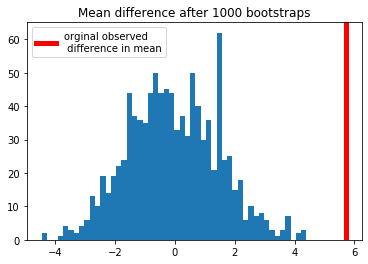

In [94]:
import matplotlib.pyplot as plt
plt.hist(metrics,bins=50)
plt.axvline(original,color='red',linewidth=5,label='orginal observed \n difference in mean')
plt.title('Mean difference after 1000 bootstraps')
plt.legend()
plt.show()

In [98]:
from random import randrange
import numpy as np
setA = [randrange(10, 19) for k in range(10)]
setB = [randrange(20, 29) for k in range(15)]

bootstrap_test(setA,setB,1000,np.var,0.05)

'Fail to Reject Null Hypothesis p-value 0.442'

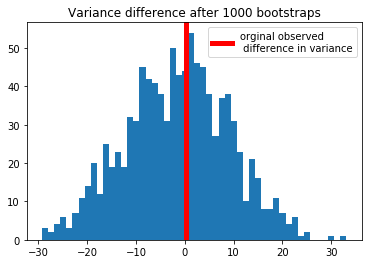

In [99]:
dataA = setA
dataB = setB
metrics = []
metric = np.var
number_bootstraps=1000
full_set = dataA+dataB
original = metric(dataA)-metric(dataB)
for i in range(number_bootstraps):
    scamble_set = random.shuffle(full_set) 
    a_prime = metric(full_set[:len(dataA)])
    b_prime = metric(full_set[len(dataA):])
    metrics.append(a_prime-b_prime)
    
import matplotlib.pyplot as plt
plt.hist(metrics,bins=50)
plt.axvline(original,color='red',linewidth=5,label='orginal observed \n difference in variance')
plt.title('Variance difference after 1000 bootstraps')
plt.legend()
plt.show()